# Exploratory data analysis Pre-class assignment 2 Analysis of housing information

In [1]:
!pip install missingno

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
%matplotlib inline

<hr>

**[Problem 1] Obtaining a dataset**

<hr>

In [3]:
data = pd.read_csv("train.csv")

display(data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<hr>

**[Problem 2] Investigating the dataset itself**

<hr>

This dataset is a collection of housing data that includes a wide range of house characteristics to consider when buying or renting a home.

This includes data fields such as:

* sale price

* sale conditions

more

This data set will assist us in visualizing and comprehending some of the most significant factors that influence home sales.


<hr>

**[Problem 3] Checking the data**

<hr>


**See what each feature is about. (Numerical data or text data, etc.)**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Check which column is the target variable this time** 

'SalePrice' is the reason of our quest. It's like when we're going to a party. We always have a reason to be there. Usually, women are that reason. (disclaimer: adapt it to men, dancing or alcohol, according to your preferences)
so

    the target variable is SalePrice

In [5]:
data["SalePrice"].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

**Display the mean, standard deviation, and quartiles of the feature values at once.**

In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<hr>

**[Problem 4] Dealing with missing values**

<hr>

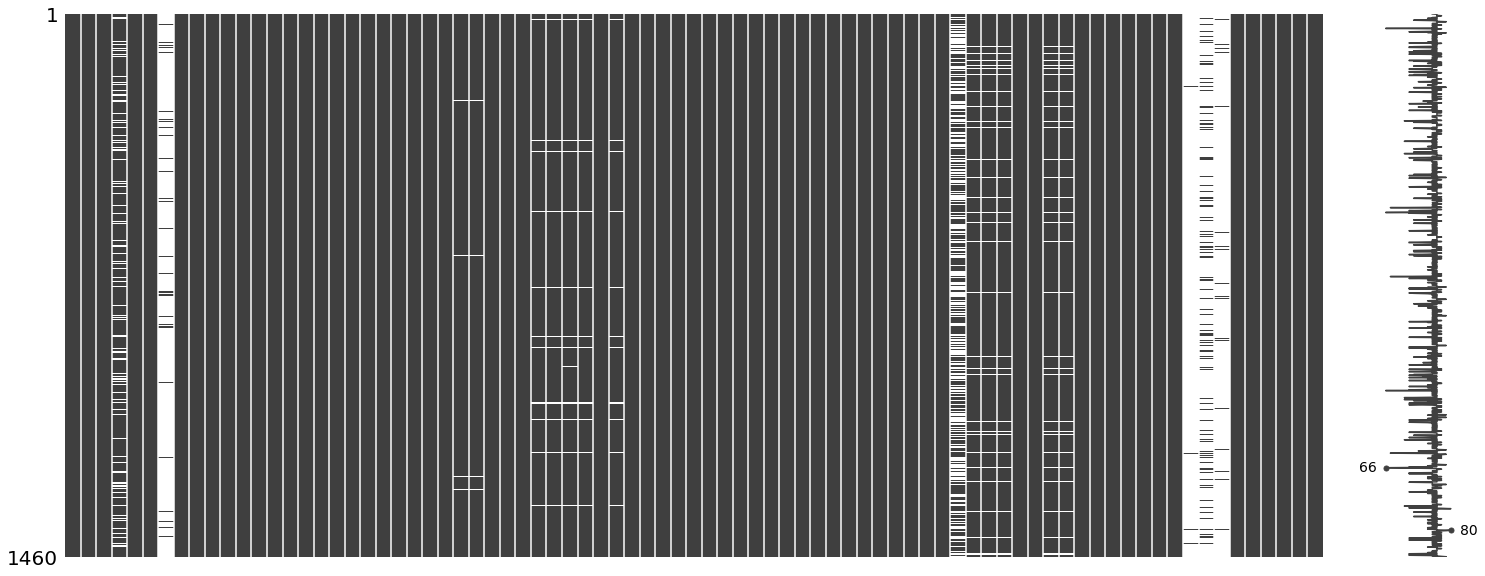

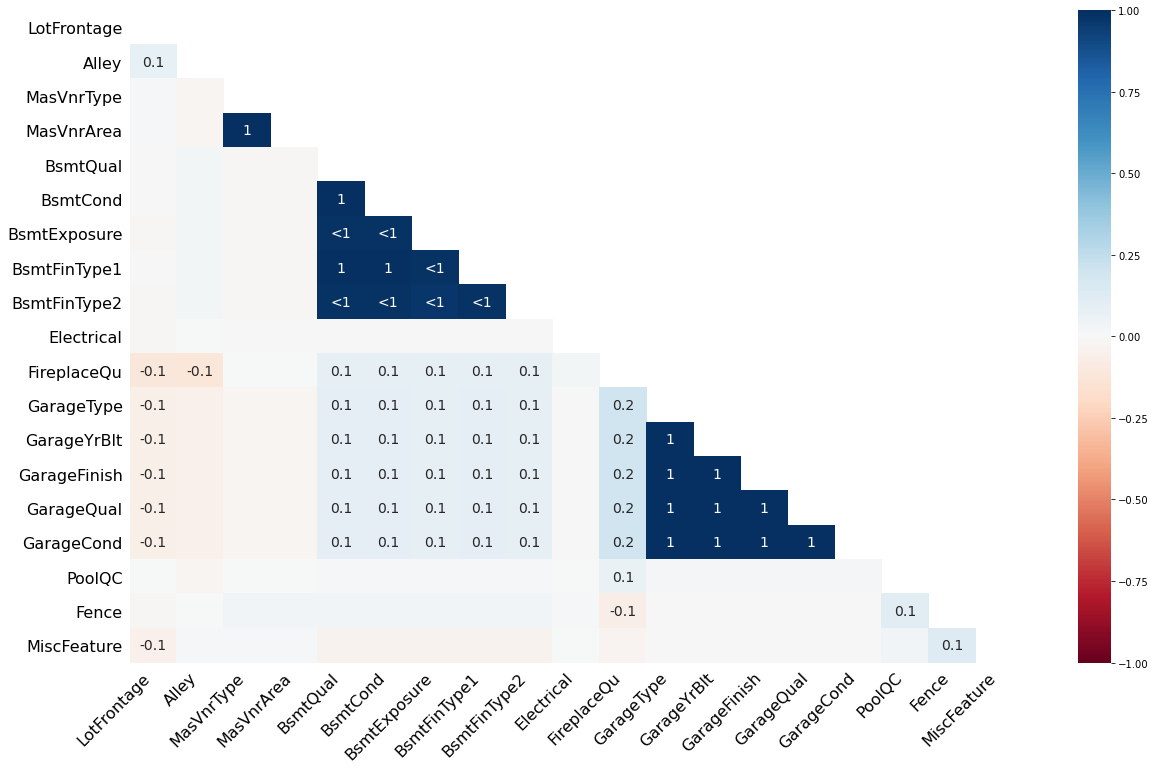

In [7]:
msno.matrix(data)
msno.heatmap(data)

In [8]:
total = data.isnull().sum()
missing_ratio = (data.isnull().sum() / data.isnull().count())*100

table_missing = pd.concat((total, missing_ratio), axis=1, keys=['total', "missing_ratio"])

table_missing = table_missing.sort_values(by = ['total'], ascending=False)

display(table_missing)


,total,missing_ratio
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
...,...,...
ExterQual,0,0.000000
Exterior2nd,0,0.000000
Exterior1st,0,0.000000
RoofMatl,0,0.000000


In [9]:
dw = table_missing.loc[table_missing['total'] >= 5].iloc[:,:0].T

data = data.drop(dw, axis=1)

display(data)


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [10]:
data = data.drop(data.loc[data['Electrical'].isnull()].index)

data.isnull().sum().max()

0

<hr>

**[Problem 5] Researching terminology**

<hr>

* Kurtosis is one of the two measures that quantify shape of of a distribution. The another measure is skewness. Kurtosis describes the peakedness of the distribution. If the distribution is tall and thin it is called a leptokurtic distribution. Values in a leptokurtic distribution are near the mean or at the extremes. A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic distribution. A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic distribution. A mesokurtic distribution looks more close to a normal distribution.

* Skewness is a measure of asymmetry of a distribution. Another measure that describes the shape of a distribution is kurtosis. In a normal distribution, the mean divides the curve symmetrically into two equal parts at the median and the value of skewness is zero. When a distribution is asymmetrical the tail of the distribution is skewed to one side-to the right or to the left. When the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve. When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve.



<hr>

**[Problem 6] Confirming distribution**

<hr>

Skewness from data : 1.881943
Kurtosis from data : 6.529263



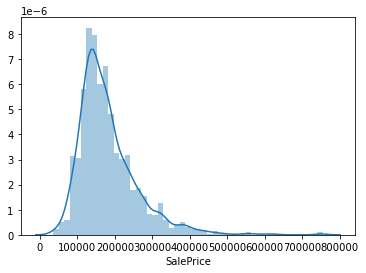

In [11]:
sns.distplot(data["SalePrice"])

print("Skewness from data : {:f}".format(data['SalePrice'].skew()))
print("Kurtosis from data : {:f}\n".format(data['SalePrice'].kurt()))

In [12]:
a_logarithmic_transformation = np.log(data["SalePrice"])
print("A logarithmic transformation in Target value (saleprice) : \n\n{}".format(a_logarithmic_transformation))

A logarithmic transformation in Target value (saleprice) : 

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1459, dtype: float64


Skewness from a logarithmic transformation : 0.121318
Kurtosis from a logarithmic transformation : 0.806928



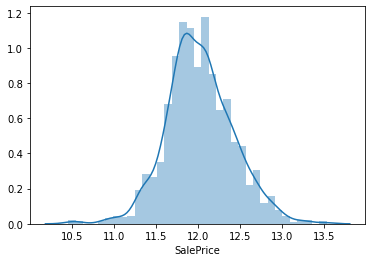

In [13]:
sns.distplot(a_logarithmic_transformation)

print("Skewness from a logarithmic transformation : {:f}".format(a_logarithmic_transformation.skew()))
print("Kurtosis from a logarithmic transformation : {:f}\n".format(a_logarithmic_transformation.kurt()))

    After logarithmic transformation the skewness and kurtosis i decrease. That make prediction improved more and more

<hr>

**[Problem 7] Confirming the correlation coefficient**

<hr>

**Create a heat map of the correlation coefficient matrix and find the relationships with high correlation coefficients.**

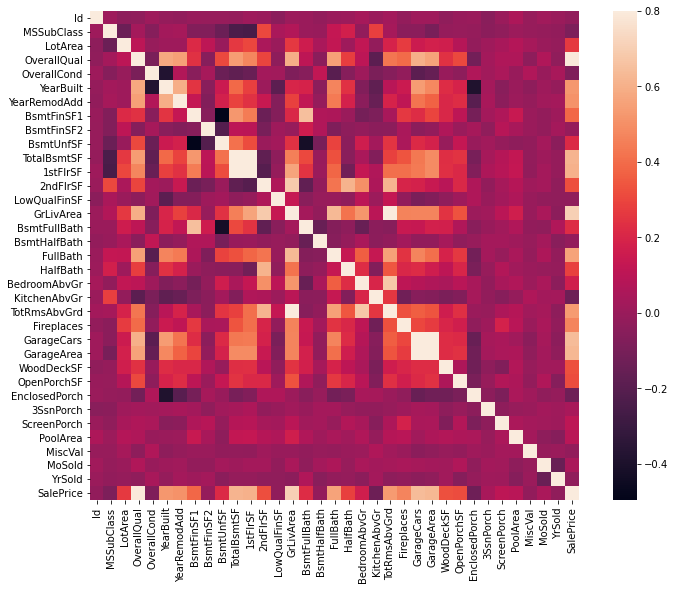

In [14]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

**Select 10 features that have a high correlation with the target variable, and create a correlation coefficient matrix heat map for these.**

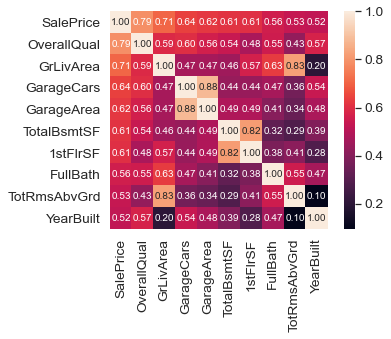

In [15]:
cols = data.corr().nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Summarize whether the 10 selected features represent something by referring to the description in Kaggle's DataDescription.**

* 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. 'GarageCars' and 'GarageArea' are like twin brothers. 'GarageCars' since its correlation with 'SalePrice' is higher.

* OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'

* 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers.

* 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again.

* 'FullBath'this indicates the number of bathrooms.

* 'YearBuilt' It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, I start feeling that we should do a little bit of time-series analysis to get this right.

**Find 3 combinations of the 10 selected features that have high correlation coefficients with each other.**

the 3 combination that have high correlation coef is :
* 'TotalBsmtSF'

* '1stFloor'

* 'TotRmsAbvGrd'